In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.width', 320)

In [32]:
dados = pd.read_csv("archive/2016-building-energy-benchmarking.csv")
#dados.head()
#dados = dados.drop(0)



In [33]:
object_columns = [col for col in dados.columns if dados[col].dtype == 'object']
for i in object_columns:
        dados = dados.drop(columns=[i]) 


In [34]:
columns_nan = [col for col in dados.columns if (dados[col].isnull().sum() / len(dados)) * 100 > 80]
print(columns_nan)
for j in columns_nan:
        dados = dados.drop(columns=[j]) 

['ThirdLargestPropertyUseTypeGFA', 'Comments']


In [30]:
columns_switch = [col for col in dados.columns if (dados[col].isnull().sum() / len(dados)) * 100 > 0]
for k in columns_switch:
    dados[k].fillna(dados[k].mean(), inplace = True)

In [31]:
print(dados.corr(method = 'pearson'))

                                 OSEBuildingID  DataYear   ZipCode  CouncilDistrictCode  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
OSEBuildingID                         1.000000       NaN  0.083483            -0.089295  0.092736   0.040473   0.177302           0.025595       -0.103456         -0.136508  ...            -0.118035              -0.203240       -0.033543         -0.129994          -0.129994           -0.085505         -0.085505   
DataYear                                   NaN       NaN       NaN                  NaN       NaN        NaN        NaN                NaN             NaN               NaN  ...                  NaN                    NaN             NaN               NaN                NaN                 NaN               NaN   
ZipCode                               0.083483      

<Axes: >

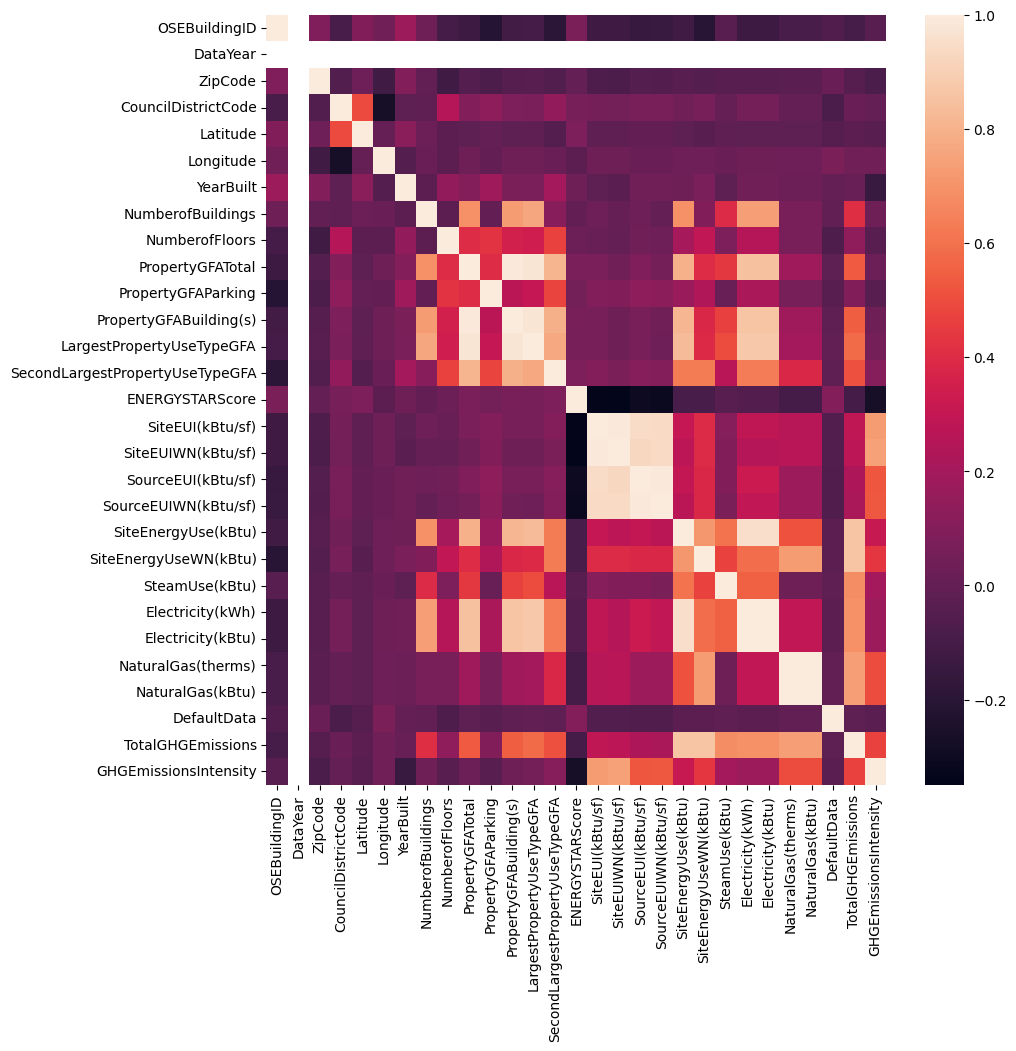

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr())